# 比較2018年地震深度與規模的關係

#  Import

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
#mpl.rc('font', family='Noto Sans CJK TC')  # 設定patplotlib可顯示中文，這邊不可行，所以用下面那行
myf = FontProperties(fname='C:\Windows\Fonts\msjh.ttc')


# 資料來源 : https://scweb.cwb.gov.tw/zh-tw/earthquake/data/
# 資料內容 : {地震編號、地震時間、經緯度、規模、深度、位置}

In [ ]:
df = pd.read_csv('Q5-1Data/地震活動彙整_636898215882049551.csv',encoding='big5',header=1)  # 讀csv檔
x = np.array(df['深度'])  # input x 為深度
y = np.array(df['規模'])  # prediction y 為規模
X = x.reshape(len(x),1)  # 轉換為二維


# 分割20%給testing data, 80%給training data

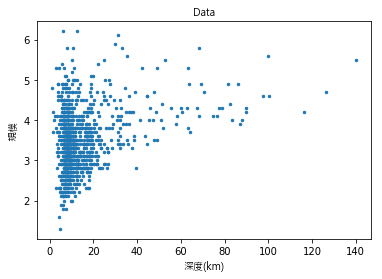

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)  # 做test和train分割

# 畫圖看看分布狀況
plt.figure(0)
plt.scatter(X, y, s=6);
plt.title('Data',fontproperties=myf);
plt.xlabel('深度(km)',fontproperties=myf);
plt.ylabel('規模',fontproperties=myf);

# 因為資料感覺很難做線性回歸，所以用10次方試試看

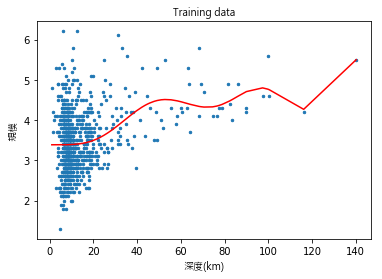

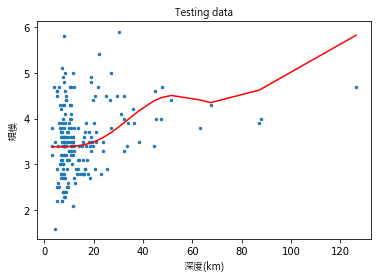

In [5]:
X_tr = [[k[0]**i for i in range(1,11)] for k in x_train]  # 在training data做[x,x^2,x^3,...,x^10]
X_te = [[k[0]**i for i in range(1,11)] for k in x_test]  # 在testing data做[x,x^2,x^3,...,x^10]

regr = LinearRegression()  # regression initialization
regr.fit(X_tr, y_train)
Y_tr = regr.predict(X_tr)
Y_te = regr.predict(X_te)

train = list(zip(x_train.reshape(-1),Y_tr.reshape(-1)))  # 把training data/ predicted label 串在一起變成(x0,y0),(x1,y1)...的形式，等等排序需用到
test = list(zip(x_test.reshape(-1),Y_te.reshape(-1)))  # 把testing data/ predicted label 串在一起變成(x0,y0),(x1,y1)...的形式，等等排序需用到
train.sort()  # 排序，排序後才可以印出正確的圖
test.sort()  # 排序，排序後才可以印出正確的圖

#印出training data的訓練結果
plt.figure(1)
plt.scatter(x_train, y_train, s=6);
plt.plot([k[0] for k in train],[k[1] for k in train], 'r')
plt.title('Training data',fontproperties=myf);
plt.xlabel('深度(km)',fontproperties=myf);
plt.ylabel('規模',fontproperties=myf);

#印出testing data的訓練結果
plt.figure(2)
plt.scatter(x_test, y_test, s=6);
plt.plot([k[0] for k in test],[k[1] for k in test], 'r')
plt.title('Testing data' ,fontproperties=myf);
plt.xlabel('深度(km)' ,fontproperties=myf);
plt.ylabel('規模' ,fontproperties=myf);